<a href="https://colab.research.google.com/github/meharsg/python/blob/main/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Kaggle Titanic Problem
 
**OBJECTIVE:** build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Step 1 will be to import csv file (dataset) onto the notebook and then cleaning the data for null values, outliers etc.

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload() #to upload local files onto google colab

Saving train.csv to train (1).csv


Now to import the following code into a dataframe we use the following code

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv'])) #df aka dataframe, if no headings exist for column in data then include header=none as pd.read_csv(url, header=none)

In [ ]:
uploaded= files.upload()

Saving test.csv to test.csv


In [ ]:
df_test=pd.read_csv(io.BytesIO(uploaded['test.csv']))

Now to print a few rows of the dataframe

In [ ]:
df.head(3)   #first n rows of dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
df.tail(3)   #last n rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


The next step would be to understand the data one is working with. This involves checking the data types, datat distribution and locate potential issues with the data.

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We use a statistical summary to see if there are any large outliers or deviation in the data. It also gives us an idea about the data, giving interesting or meaningful insights.

In [ ]:
df.describe()   #skips columns that are object type

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include="all")   #to provide a summary of all columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lindqvist, Mr. Eino William",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df_test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Douglas, Mrs. Frederick Charles (Mary Helene B...",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We can see some problems with the data already. They are:
1. only 714 people mention their age.
2. out of 891 passengers, only 889 embarked.
3. age is given as float values?
4. difference between 75% fare and max fare value seems to be very high, possible outlier!

In [ ]:
df.info()   #for a concise summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###Data Preprocessing 
Now that we have a basic understanding of our data, we will move to pre-process it. Known as data pre-processing, data cleaning or data wrangling.

First, how to deal with missing values. The methods to do that are:

1. Recheck with data collection source.
2. Drop the missing values (either drop the row or the variable itself) - the aim is to choose that which has the least amount of impact.
3. Replace the missing values (less accurate) - replace with either the average/frequency (depending on datatype) or using other functions

Now how to do the above?

1. To drop missing values - df.dropna(subset=["column_name"], axis=0 or axis=1, inplace = True)  #0 is row, 1 is column.
2. To replace missing values, df.replace(missing_value, new_value). eg to replace with mean value, first calculate mean = df["column_name"].mean() and replace by df["column_name"].replace(np.nan, mean).


Now to apply the above knowledge to our dataset, we first work with the age column. We can't delete rows since we have less data available in the first place. The data is not arranged in any order so we need to work on replacing it with mean rather than median or mode. 

We can also try to impute the value of the age in another way. Let's try and visualise age vs pclass to see the average age of a passenger having a particular socio-economic status.

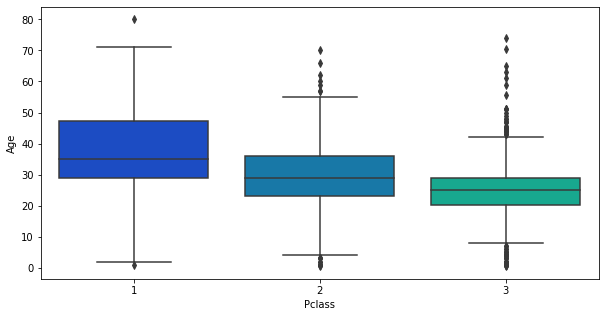

In [ ]:
#import libraries essential for data visualization

import numpy as np
import matplotlib.pyplot as plt    #used to display visualization in notebook after cod
%matplotlib inline   
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x= 'Pclass',y= 'Age', data=df,palette='winter')

Here we see, average age of Pclass 1 is 35, Pclass 2 is 29 and Pclass 3 is 25. So we make the necessary adjustment.

In [ ]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):
    if Pclass==1:
      return 35
    if Pclass==2:
      return 29
    if Pclass==3:
      return 25
    
  else:
    return Age



In [ ]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
df_test['Age']=df[['Age', 'Pclass']].apply(impute_age, axis=1)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.151706,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.155983,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,28.337321,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.796267,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,25.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,71.000000,8.000000,9.000000,512.329200


Succesfully replaced null values in age with mean of each Pclass.
Now we look at the 2 null values in the "embarked" column.

In [ ]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df.mode(axis='rows')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Abbing, Mr. Anthony",male,25.0,0.0,0.0,1601,8.05,B96 B98,S
1,2,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,C23 C25 C27,NaN
2,3,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,CA. 2343,NaN,G6,NaN
3,4,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,888,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,889,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,890,NaN,NaN,"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we replace the null values in embarked with the mode/frequency of the column embarked which is S.

In [ ]:
df["Embarked"].replace(np.nan, 'S', inplace = True)

In [ ]:
df_test['Embarked'].replace(np.nan, 'S', inplace= True)

In [ ]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Therefore, we have replaced the null values in both Age and Embarked columns. The only column that remains is the Cabin column, that only lists the cabin numbers for those travelling first class. Which implies that this specific information is only relevant when trying to find the probability of survival of a passenger in first class. 
But since our objective is to find the probability of survival of ALL passengers, we can disregard this variable altogether. 
Hence, dropping the Cabin column.

In [ ]:
df.drop(columns=['Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Now the age is given as a float value, should typically be an int value. So therefore we shall round the values of the entire column up.

In [ ]:
df['Age'].apply(np.ceil)

In [ ]:
df_test['Age'].apply(np.ceil)

In [ ]:
df['Age']=df['Age'].astype('int')   #convert age from float to int data type

In [ ]:
df_test['Age']=df_test['Age'].astype('int')

In [ ]:
df_test.dtypes

Pclass         int64
Sex         category
Age            int64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
Family         int64
dtype: object

Now we try to see if there is an outlier in fare column.


In [ ]:
df.sort_values(by=['Fare'], ascending= False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,35,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,29,0,0,239855,0.0000,NaN,S


###EDA (Exploratory Data Analysis).
Step 1. Descriptive Statistics
 

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.135802,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.164157,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lindqvist, Mr. Eino William",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.135802,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.164157,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,26.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df.shape

(891, 12)

In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             71
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

##Univariate analysis using visualization. 

The ways to visualize quantitative variables are divided into enumerative and summry plots. Enumerative plots are scatter plots, swarm plots, line plots. Summary plots are box plots, violin plots, histograms etc.

Categorical variables are visualised using bar charts and pie charts.

So we need to determine the datatype of the data given to us.

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#Quantitative variables
1. Age 
      a. scatter plot

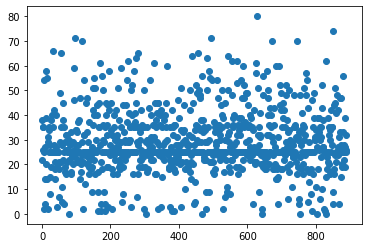

In [ ]:
plt.scatter(df.index, df['Age'])   #plots different values corresponding to index/observation no.
plt.show()

b. swarm plot

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


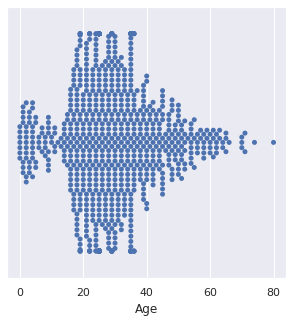

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.swarmplot(x=df['Age'])

c. Histogram

(array([ 50.,  33., 164., 328., 153.,  74.,  50.,  26.,  11.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <a list of 10 Patch objects>)

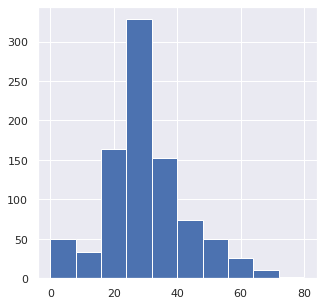

In [ ]:
plt.hist(df['Age'])

2. SibSp a. scatter plot

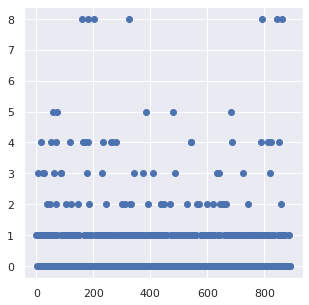

In [ ]:
plt.scatter(df.index, df['SibSp'])

b. histogram

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

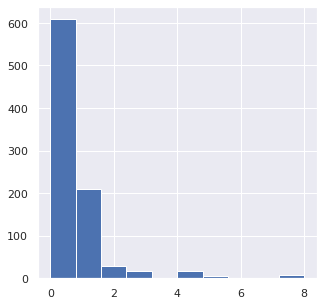

In [ ]:
plt.hist(df['SibSp'])

3. Parch a. scatter plot

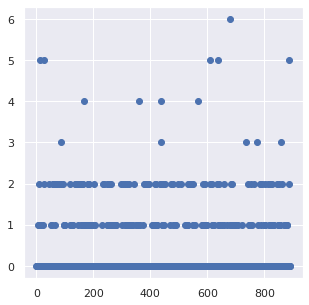

In [ ]:
plt.scatter(df.index, df['Parch'])

b. histogram

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

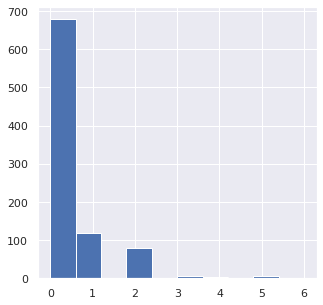

In [ ]:
plt.hist(df['Parch'])

4. Fare a.scatter plot

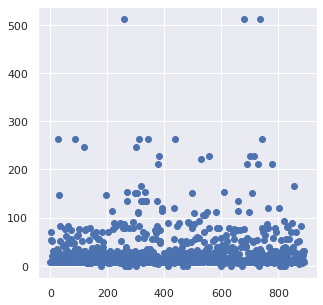

In [ ]:
plt.scatter(df.index, df['Fare'])

b. histogram

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

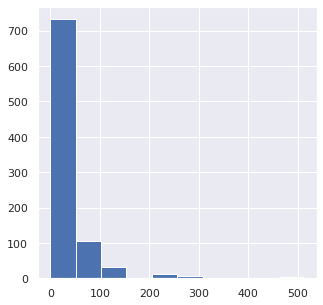

In [ ]:
plt.hist(df['Fare'])

c. boxplot

{'boxes': [<matplotlib.lines.Line2D at 0x7f810c54c990>],
 'caps': [<matplotlib.lines.Line2D at 0x7f810c550990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f810c5589d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f810c558490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f810c54ced0>,
  <matplotlib.lines.Line2D at 0x7f810c550450>]}

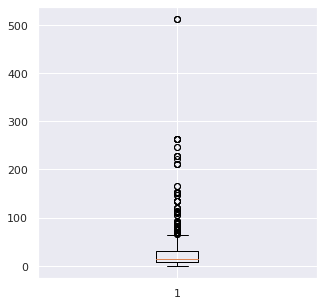

In [ ]:
plt.boxplot(df['Fare'])

5. Pclass a. histogram

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

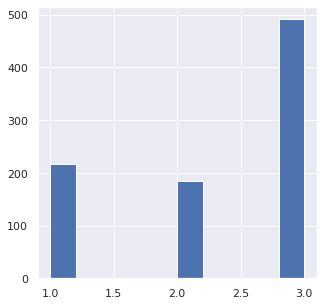

In [ ]:
plt.hist(df['Pclass'])

#Categorical Variables
1. Sex a. bar chart

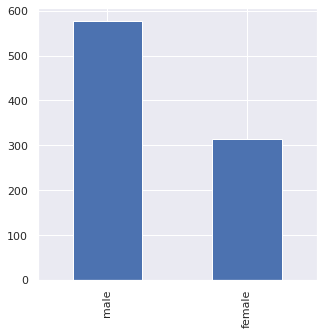

In [ ]:
df['Sex'].value_counts().plot.bar()

2. Embarked a. bar chart

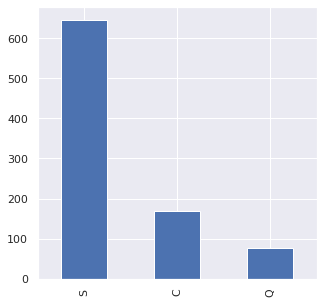

In [ ]:
df['Embarked'].value_counts().plot.bar()

##Multivariate data analysis

1. Correlation matrix

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035619,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.051648,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.393686,0.083081,0.018443,-0.549500
Age,0.035619,-0.051648,-0.393686,1.000000,-0.241666,-0.172512,0.117772
SibSp,-0.057527,-0.035322,0.083081,-0.241666,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172512,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.117772,0.159651,0.216225,1.000000


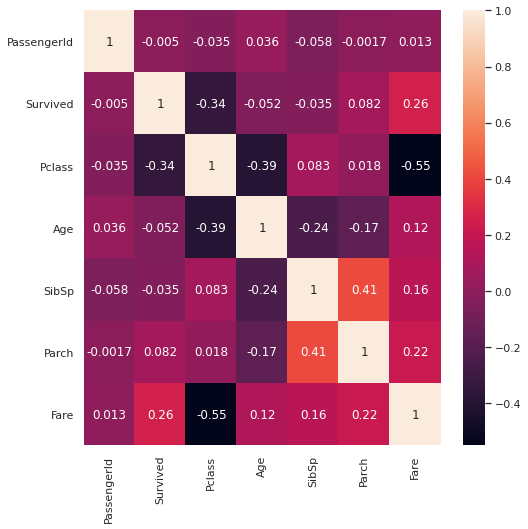

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

From here we can see that Pclass and Fare are highly correlated (ofc), followed by SibSp and Parch and then Pclass and Age. But the correlation isn't high enough to be a problem. 

###Converting categorical variables to quantitative

We'll convert the categorical features to quantitative using dummy variables in pandas. The variables that need to be converted are sex and embarked.
We'll first convert their datatype from object to category.

In [ ]:
df['Sex']=df['Sex'].astype('category')

In [ ]:
df_test['Sex']=df_test['Sex'].astype('category')

In [ ]:
df['Embarked']=df['Embarked'].astype('category')

In [ ]:
df_test['Embarked']=df_test['Embarked'].astype('category')

Now we do label encoding

In [ ]:
df['Sex']=df['Sex'].cat.codes
df['Embarked']=df['Embarked'].cat.codes

In [ ]:
df_test['Sex']=df_test['Sex'].astype('category')

In [ ]:
df_test['Embarked']=df_test['Embarked'].astype('category')

In [ ]:
df_test['Sex']=df_test['Sex'].cat.codes
df_test['Embarked']=df_test['Embarked'].cat.codes

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,2


Dropping columns name, passengerid, ticket and cabin. 

In [ ]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [ ]:
df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

Summing two columns sibsp and parch and calling it family.

In [ ]:
sum_column= df['SibSp'] + df['Parch']
df['Family']= sum_column

In [ ]:
sum_column= df_test['SibSp'] + df_test['Parch']
df_test['Family']= sum_column

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,2,0


In [ ]:
df.drop(columns=['SibSp', 'Parch'], inplace=True)

In [ ]:
df_test.drop(columns=['SibSp', 'Parch'], inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22,7.2500,2,1
1,1,1,0,38,71.2833,0,1
2,1,3,0,26,7.9250,2,0
3,1,1,0,35,53.1000,2,1
4,0,3,1,35,8.0500,2,0


In [ ]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,1,0,0,0,0.015282,1,0
1,3,0,0,1,0,0.013663,2,1
2,2,1,0,0,0,0.018909,1,0
3,3,1,0,0,0,0.016908,2,0
4,3,0,0,1,1,0.023984,2,2


Normalizing Fare

In [ ]:
df["Fare"] = (df["Fare"] - df["Fare"].min()) / (df["Fare"].max() - df["Fare"].min())
df['Fare'] = df['Fare'].fillna(-999)

df_test["Fare"] = (df_test["Fare"] - df_test["Fare"].min()) / (df_test["Fare"].max() - df_test["Fare"].min())
df_test['Fare'] = df_test['Fare'].fillna(-999)

Standardizing Age

In [ ]:
df["Age"] = (df["Age"] - df["Age"].mean()) / df["Age"].std()
df["Age"] = df["Age"].fillna(-999)

df_test["Age"] = (df_test["Age"] - df_test["Age"].mean()) / df_test["Age"].std()
df_test["Age"] = df_test["Age"].fillna(-999)

In [ ]:
df_test.dtypes

Pclass         int64
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
Family         int64
dtype: object

Our data is ready for modelling now!

###Building a Logistic Regression Model

In [ ]:
X= df.drop(['Survived'], axis=1)
y= df['Survived']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
model = LogisticRegression(random_state=0, max_iter=2500)
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=model.predict(df_test)